# Explore ESRF data

This notebook contains example scripts for loading ESRF data using CIL by extracting the necessary metadata from an HDF5 file. Once you have identified the correct locations of data and metadata, create a custom reader and save it as a script so you can access many files with the same structure.

In [2]:
# CIL methods
from cil.utilities.display import show_geometry
from cil.utilities.jupyter import islicer
from cil.io.utilities import HDF5_utilities
# Additional packages
import matplotlib.pyplot as plt # conda install matplotlib
import hdf5plugin # conda install -c conda-forge hdf5plugin
import glob
import os
# Custom methods
from scripts.HDF5_ParallelDataReader import HDF5_ParallelDataReader

Specify the parent directory and list the scans

In [3]:
parent_directory = '/mnt/share/ESRF/test_data/'

files = glob.glob(os.path.join(parent_directory, '*.h5'))
for i, file in enumerate(files):
    print(str(i) + ': ' + str(file))
    
filename = files[0]

0: /mnt/share/ESRF/test_data/PC811_1000cycles_absct_final_0001.h5


Print the metadata to find the locations of data and scan information

In [4]:
# HDF5_utilities.print_metadata(filename) # comment out for rendering online

Configure paths to the relevant data and metadata in the file, then read the data

In [5]:
reader = HDF5_ParallelDataReader(filename, 
                                 dataset_path=('1.1/measurement/pcoedgehs/',
                                               '4.1/measurement/pcoedgehs/'),
                                 distance_units='mm', angle_units='degree')

reader.configure_angles(angles_path=('1.1/measurement/hrrz_center',
                        '4.1/measurement/hrrz_center'))

reader.configure_pixel_sizes('1.1/instrument/pcoedgehs/x_pixel_size',
                             '1.1/instrument/pcoedgehs/y_pixel_size', HDF5_units = 'um')

reader.configure_normalisation_data(flatfield_path='2.1/measurement/pcoedgehs/',
                                    darkfield_path='3.1/measurement/pcoedgehs/')

reader.configure_sample_detector_distance(sample_detector_distance=90, HDF5_units='mm') # this is necessary for phase retrieval

data = reader.read()

Use `islicer()` to visualise the data

In [6]:
islicer(data)

And show_geometry() to check the orientation

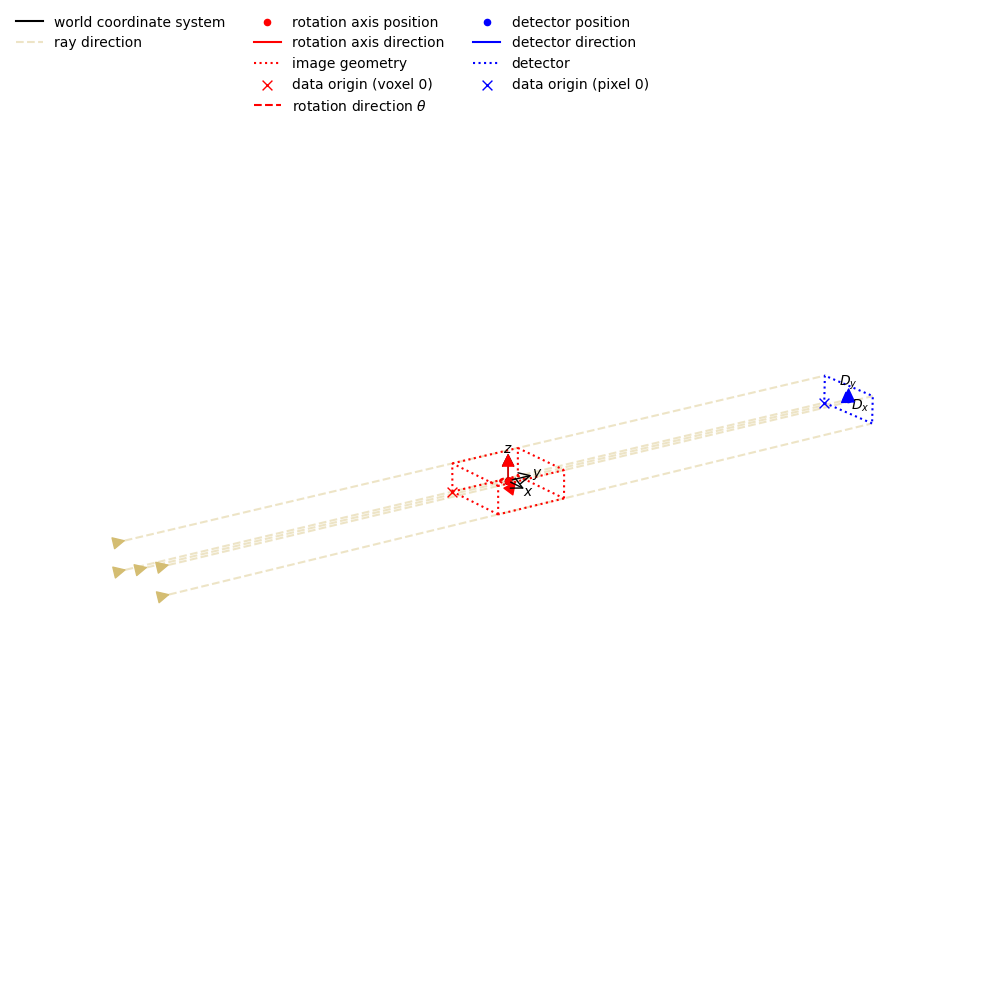

In [7]:
show_geometry(data.geometry)

Check the dark and flat field

In [13]:
islicer(reader.darkfield)

In [12]:
islicer(reader.flatfield)

And plot a histogram of the data

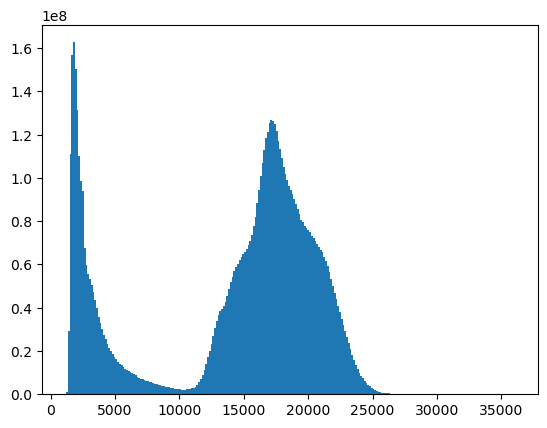

In [8]:
plt.hist(data.array.ravel(), bins=256)
plt.show()

If the data loads correctly, save the configuration as a new method in the `scripts/Custom_DataReaders.py` and import it into the cil_pipeline.iypnb notebook using `from scripts.Custom_DataReaders import Custom_DataReader`